In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                              f1_score, confusion_matrix, classification_report,
                              roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Load preprocessed data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Target distribution in training: {np.bincount(y_train)}")

Training set: (237, 13)
Test set: (60, 13)
Target distribution in training: [128 109]


In [8]:
# Create a dictionary of models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier()
}

# Train all models and store results
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    results[name] = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None,
        'predictions': y_pred
    }
    
    print(f"{name} trained successfully!")

print("\n✅ All models trained!")


Training Logistic Regression...
Logistic Regression trained successfully!

Training Decision Tree...
Decision Tree trained successfully!

Training Random Forest...
Random Forest trained successfully!

Training Gradient Boosting...
Gradient Boosting trained successfully!

Training SVM...
SVM trained successfully!

Training KNN...
KNN trained successfully!

✅ All models trained!



📊 MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      Random Forest  0.850000   0.880000 0.785714  0.830189 0.940290
                SVM  0.850000   0.880000 0.785714  0.830189 0.939732
Logistic Regression  0.833333   0.846154 0.785714  0.814815 0.948661
                KNN  0.816667   0.840000 0.750000  0.792453 0.915179
  Gradient Boosting  0.766667   0.769231 0.714286  0.740741 0.882812
      Decision Tree  0.700000   0.692308 0.642857  0.666667 0.696429


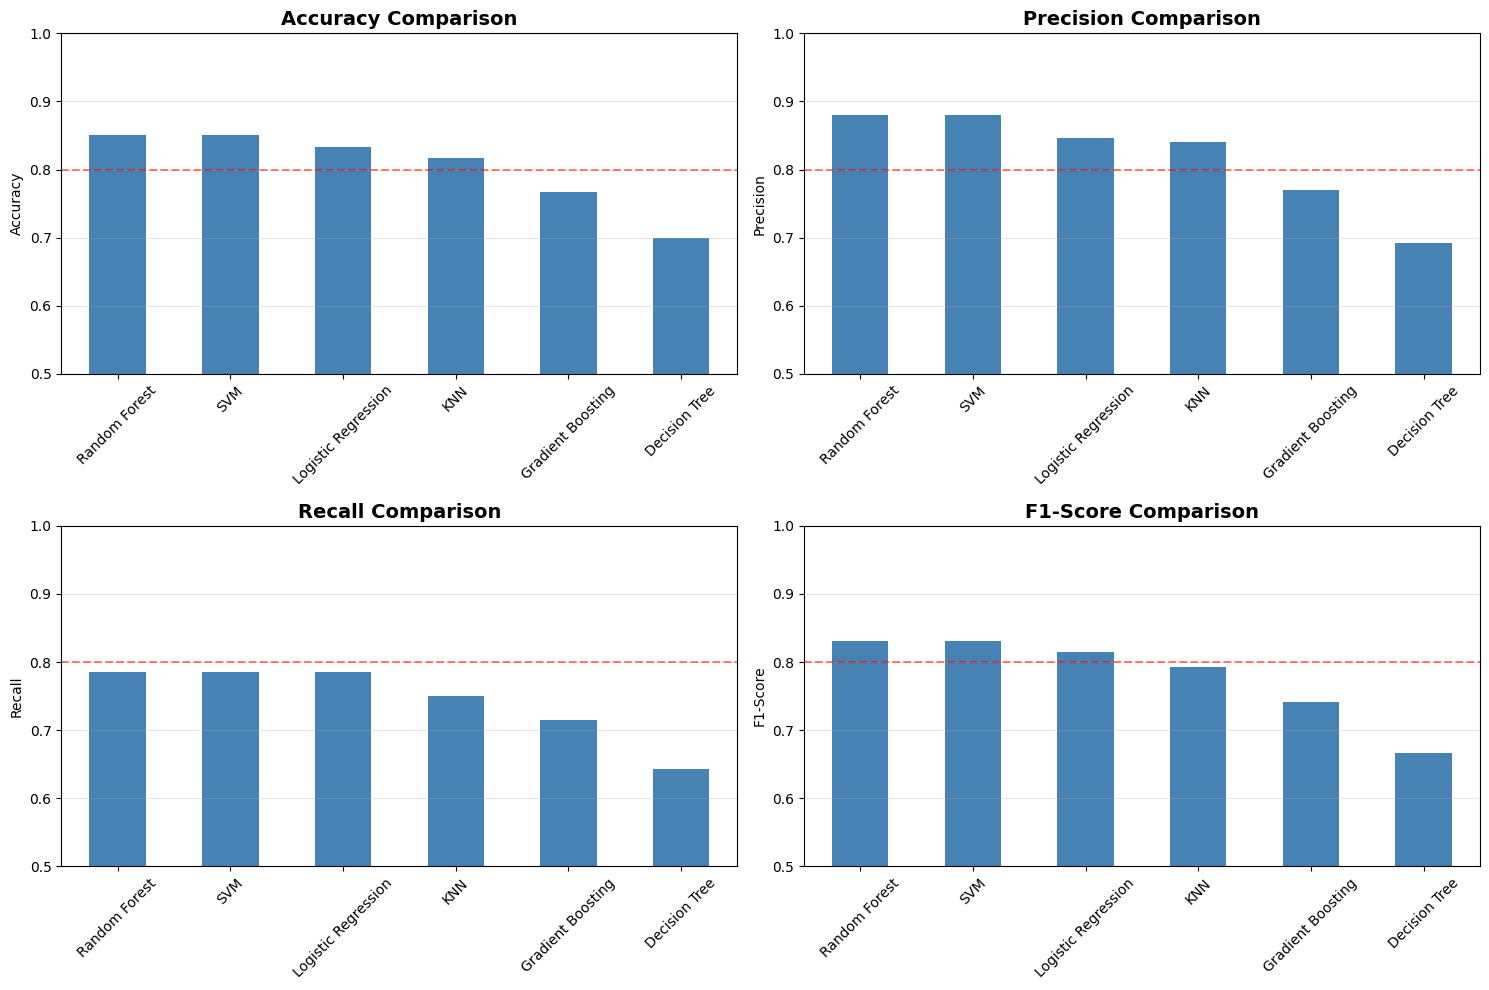


🏆 Best Model: Random Forest
   Accuracy: 0.8500


In [9]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results]
})

# Fixed: Changed 'accuracy' to 'Accuracy' (capital A)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print("\n📊 MODEL PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx//2, idx%2]
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False, color='steelblue')
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel(metric)
    ax.set_ylim([0.5, 1.0])
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='80% threshold')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")

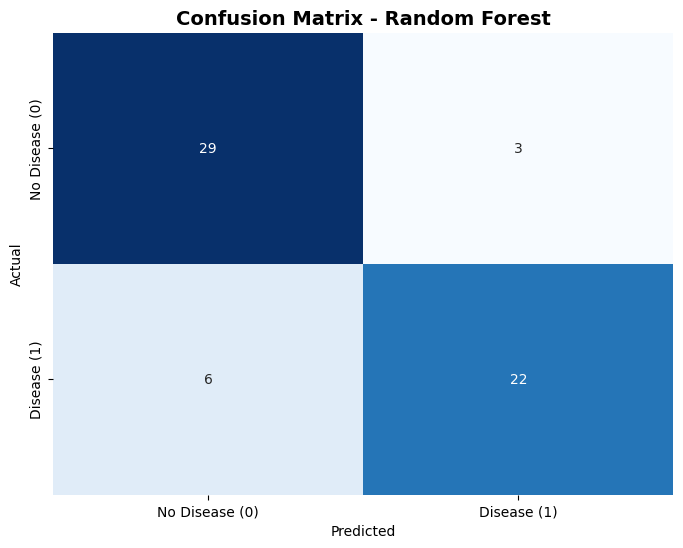


📋 DETAILED METRICS FOR Random Forest
True Negatives (Correct 'No Disease'):  29
False Positives (Incorrectly predicted 'Disease'): 3
False Negatives (Missed 'Disease'): 6 ⚠️ CRITICAL
True Positives (Correct 'Disease'):  22

Specificity (True Negative Rate): 0.9062
Sensitivity (Recall/True Positive Rate): 0.7857

📊 CLASSIFICATION REPORT
              precision    recall  f1-score   support

  No Disease       0.83      0.91      0.87        32
     Disease       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [12]:
# Get the best model
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['No Disease (0)', 'Disease (1)'])
plt.yticks([0.5, 1.5], ['No Disease (0)', 'Disease (1)'])
plt.show()

# Calculate additional metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\n📋 DETAILED METRICS FOR {best_model_name}")
print("="*60)
print(f"True Negatives (Correct 'No Disease'):  {tn}")
print(f"False Positives (Incorrectly predicted 'Disease'): {fp}")
print(f"False Negatives (Missed 'Disease'): {fn} ⚠️ CRITICAL")
print(f"True Positives (Correct 'Disease'):  {tp}")
print("="*60)
print(f"\nSpecificity (True Negative Rate): {tn/(tn+fp):.4f}")
print(f"Sensitivity (Recall/True Positive Rate): {tp/(tp+fn):.4f}")
print("="*60)

# Classification Report
print(f"\n📊 CLASSIFICATION REPORT")
print(classification_report(y_test, best_predictions, 
                           target_names=['No Disease', 'Disease']))

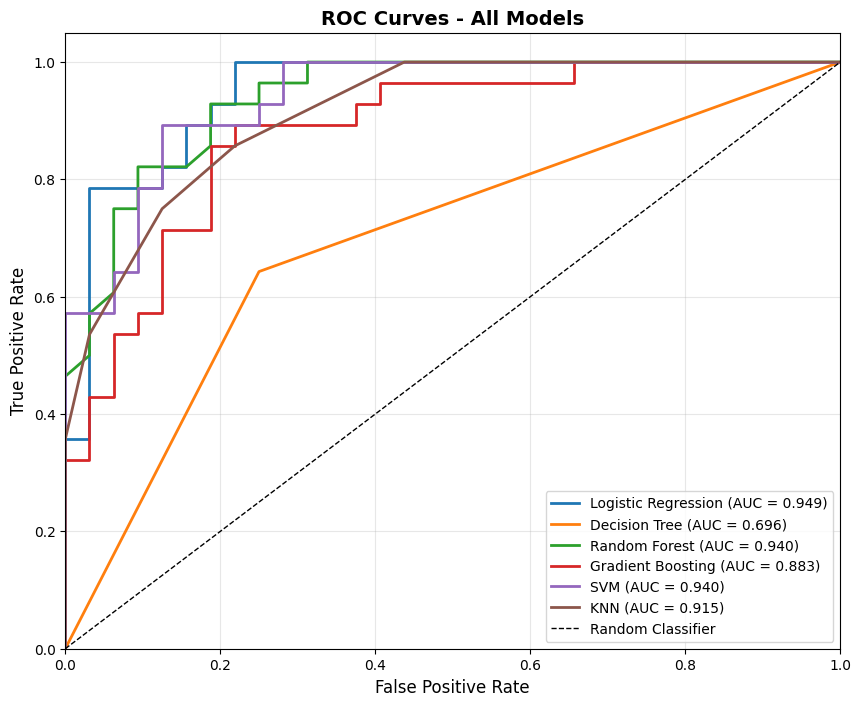

In [13]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name in results:
    if results[name]['roc_auc'] is not None:
        y_pred_proba = results[name]['model'].predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = results[name]['roc_auc']
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()



🎯 FEATURE IMPORTANCE - Random Forest
 Feature  Importance
      cp    0.142026
    thal    0.121343
 thalach    0.121171
 oldpeak    0.114941
      ca    0.097343
     age    0.094498
    chol    0.089249
trestbps    0.074933
   slope    0.052362
   exang    0.036495
     sex    0.026008
 restecg    0.020033
     fbs    0.009596


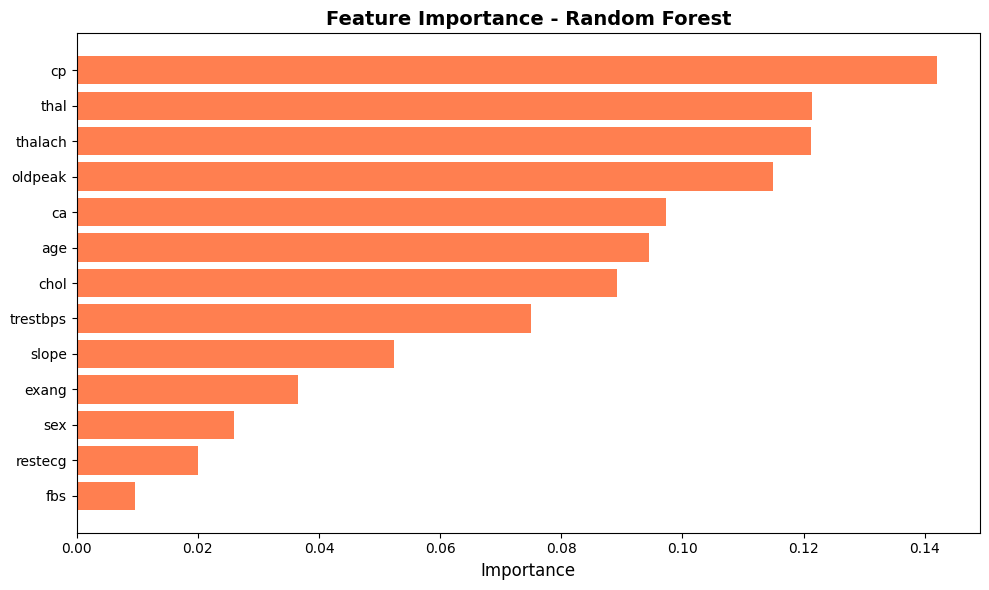

In [14]:
# Check if best model has feature_importances_
if hasattr(best_model, 'feature_importances_'):
    # Get feature importances
    importances = best_model.feature_importances_
    feature_names = X_train.columns
    
    # Create dataframe
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\n🎯 FEATURE IMPORTANCE - {best_model_name}")
    print("="*60)
    print(feature_importance_df.to_string(index=False))
    print("="*60)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='coral')
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"\n⚠️ {best_model_name} doesn't provide feature importance")
    print("For Logistic Regression, we can check coefficients instead:")
    
    if hasattr(best_model, 'coef_'):
        coef_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': best_model.coef_[0]
        }).sort_values('Coefficient', key=abs, ascending=False)
        
        print("\n📊 FEATURE COEFFICIENTS")
        print(coef_df.to_string(index=False))

In [15]:
import pickle

# Save the best model
model_filename = f'../models/best_model_{best_model_name.lower().replace(" ", "_")}.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"✅ Best model saved: {model_filename}")
print(f"\n🎉 MODEL TRAINING COMPLETE!")
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['accuracy']:.4f}")

✅ Best model saved: ../models/best_model_random_forest.pkl

🎉 MODEL TRAINING COMPLETE!
Best Model: Random Forest
Test Accuracy: 0.8500
